In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("StudentsPerformance.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
#the dimension of the data
data.shape

(1000, 8)

In [4]:
# checking of the data has missing values or not
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
data.rename(columns = {'parental level of education' : 'parental_level_of_education', 'test preparation course' : 'test_preparation_course',
                    'math score':'math_score','reading score':'reading_score','writing score':'writing_score'}, inplace = True)

In [6]:
data.nunique()

# Anything less that 30 means it is a categorical variable

gender                          2
race/ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

female    518
male      482
Name: gender, dtype: int64


Text(0.5, 1.05, 'Fig1')

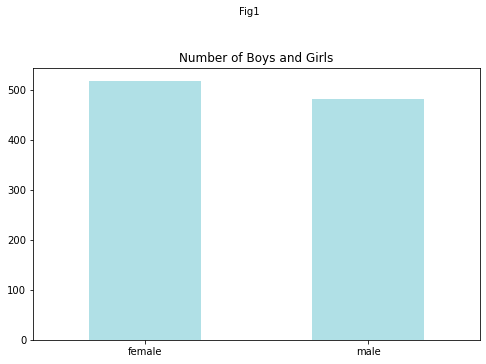

In [7]:
print(data['gender'].value_counts())  # Tell us the count of male and female students
data['gender'].value_counts().plot(kind = 'bar',title = 'Number of Boys and Girls',figsize=(8,5),color = 'powderblue')
plt.xticks(rotation=0)
plt.suptitle("Fig1", y=1.05, fontsize=10)

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64


Text(0.5, 1.05, 'Fig2')

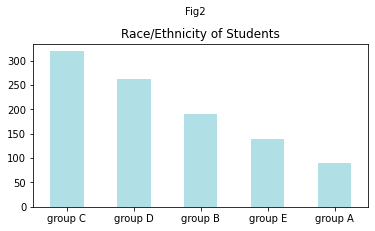

In [8]:
print(data['race/ethnicity'].value_counts(sort=True))
data['race/ethnicity'].value_counts(sort=True).plot(kind='bar',title="Race/Ethnicity of Students",figsize=(6,3),color = 'powderblue')
plt.xticks(rotation=0)
plt.suptitle("Fig2", y=1.05, fontsize=10)

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64


Text(0.5, 1.05, 'Fig3')

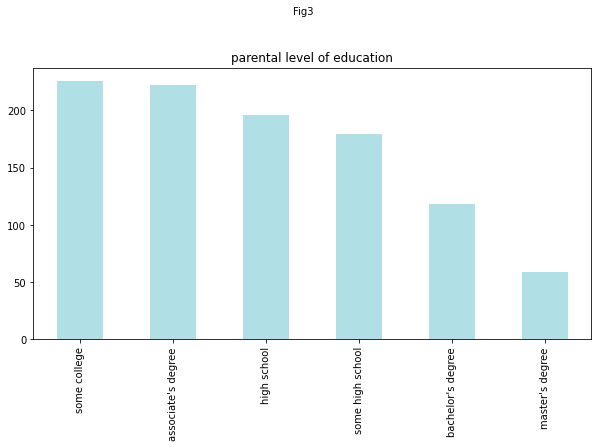

In [9]:
print(data['parental_level_of_education'].value_counts(sort=True))
data['parental_level_of_education'].value_counts().plot(kind='bar',title="parental level of education",figsize=(10,5),color = 'powderblue')
plt.suptitle("Fig3", y=1.05, fontsize=10)

standard        645
free/reduced    355
Name: lunch, dtype: int64


Text(0.5, 1.05, 'Fig4')

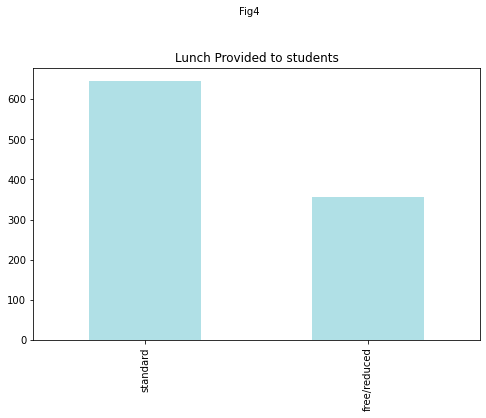

In [10]:
print(data['lunch'].value_counts(sort=True))
data['lunch'].value_counts().plot(kind='bar',title="Lunch Provided to students",figsize=(8,5),color = 'powderblue')
plt.suptitle("Fig4", y=1.05, fontsize=10)

none         642
completed    358
Name: test_preparation_course, dtype: int64


Text(0.5, 1.05, 'Fig5')

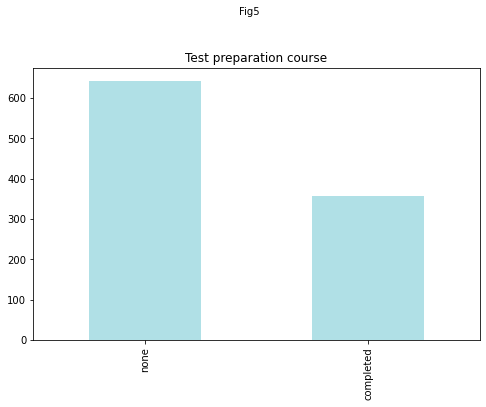

In [11]:
print(data['test_preparation_course'].value_counts())
data['test_preparation_course'].value_counts().plot(kind='bar',title="Test preparation course",figsize=(8,5),color = 'powderblue')
plt.suptitle("Fig5", y=1.05, fontsize=10)

Text(0.5, 1.05, 'Fig6')

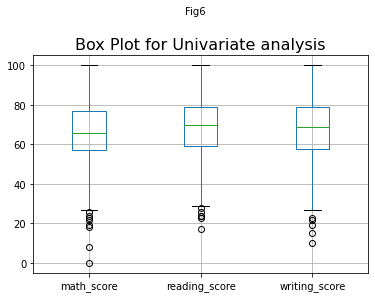

In [12]:
#univariate analysis
data.boxplot()
plt.title('Box Plot for Univariate analysis',fontsize=16)
plt.suptitle("Fig6", y=1.05, fontsize=10)

Text(0.5, 1.0, 'Fig7')

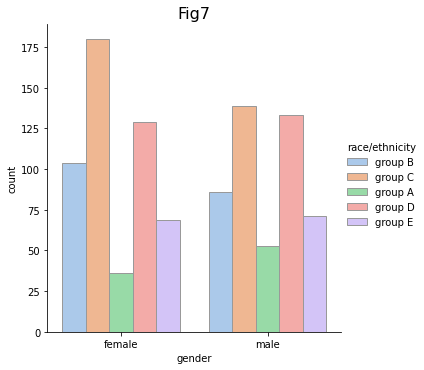

In [13]:
sns.catplot(x = "gender",hue="race/ethnicity", kind="count",edgecolor=".6",palette="pastel",data=data)
plt.title('Fig7',fontsize=16)

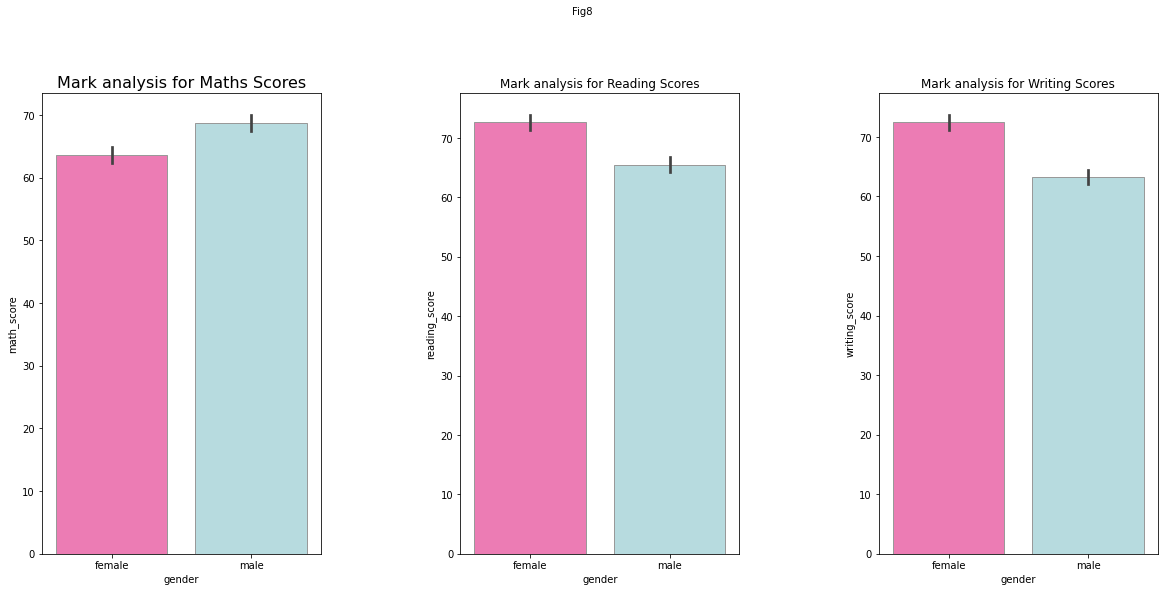

        math_score  reading_score  writing_score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


In [14]:
#Performace analysis 
plt.figure(figsize=(20,8))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,wspace=0.5, hspace=0.2)

plt.subplot(131)
sns.barplot(y = "math_score",x = 'gender',edgecolor=".6",data=data,palette = ['hotpink','powderblue'])
plt.title('Mark analysis for Maths Scores',fontsize=16)
plt.suptitle("Fig8", y=1.05, fontsize=10)

plt.subplot(132)
plt.title('Mark analysis for Reading Scores')
sns.barplot(x="gender", y="reading_score",edgecolor=".6",data=data,palette = ['hotpink','powderblue'])

plt.subplot(133)
plt.title('Mark analysis for Writing Scores')
sns.barplot(x="gender", y="writing_score",edgecolor=".6",data=data,palette = ['hotpink','powderblue'])
plt.show()


# Mean scores
print(data.groupby(by="gender", dropna=False).mean())

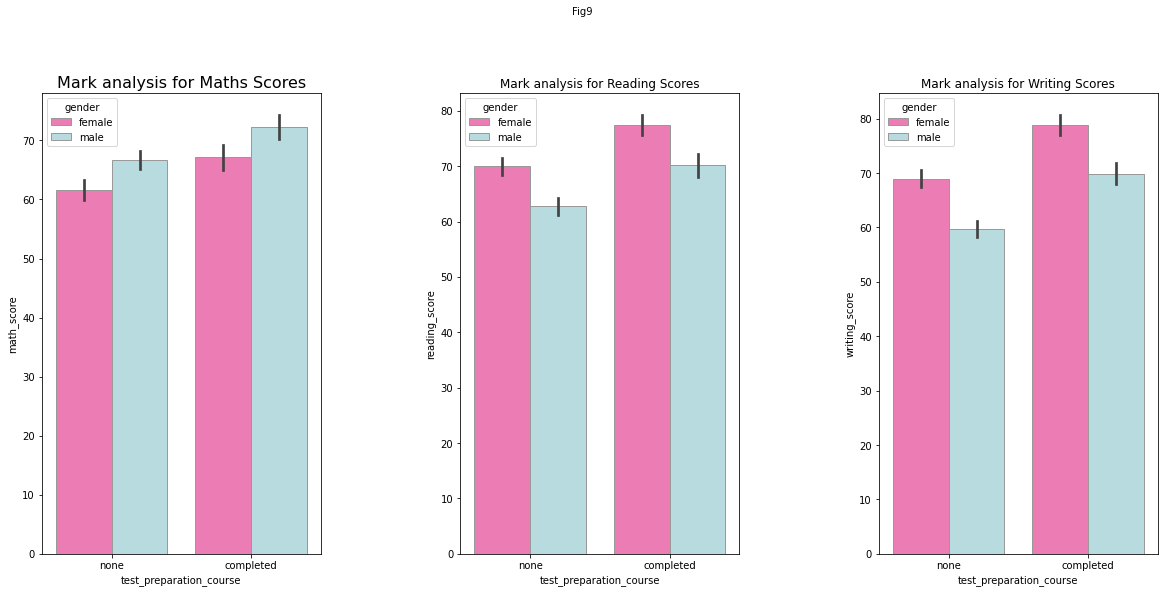

In [15]:
# Analysing the scoring pattern of based on test preparation course

plt.figure(figsize=(20,8))
plt.suptitle("Fig9", y=1.05, fontsize=10)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,wspace=0.5, hspace=0.2)

plt.subplot(131)
sns.barplot(y = "math_score",x = 'test_preparation_course',hue = 'gender',edgecolor=".6",data=data,palette = ['hotpink','powderblue'])
plt.title('Mark analysis for Maths Scores',fontsize=16)


plt.subplot(132)
plt.title('Mark analysis for Reading Scores')
sns.barplot(x="test_preparation_course", y="reading_score",hue = 'gender',edgecolor=".6",data=data,palette = ['hotpink','powderblue'])

plt.subplot(133)
plt.title('Mark analysis for Writing Scores')
sns.barplot(x="test_preparation_course", y="writing_score",hue = 'gender',edgecolor=".6",data=data,palette = ['hotpink','powderblue'])
plt.show()

                             math_score  reading_score  writing_score
parental_level_of_education                                          
associate's degree            67.882883      70.927928      69.896396
bachelor's degree             69.389831      73.000000      73.381356
high school                   62.137755      64.704082      62.448980
master's degree               69.745763      75.372881      75.677966
some college                  67.128319      69.460177      68.840708
some high school              63.497207      66.938547      64.888268


<AxesSubplot:xlabel='parental_level_of_education'>

<Figure size 432x288 with 0 Axes>

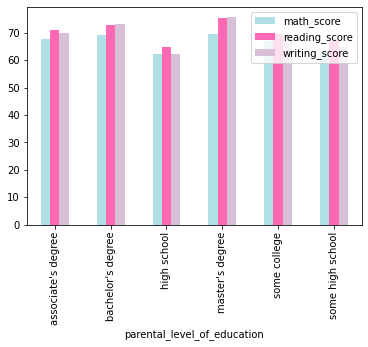

In [16]:
score_trend = data.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score']].mean()
print(score_trend)

plt.suptitle("Fig10", y=1.05, fontsize=10)
score_trend.plot(kind = 'bar',color = ['powderblue','hotpink','thistle'])

<AxesSubplot:title={'center':'Ethinicity and Lunch'}, xlabel='race/ethnicity', ylabel='count'>

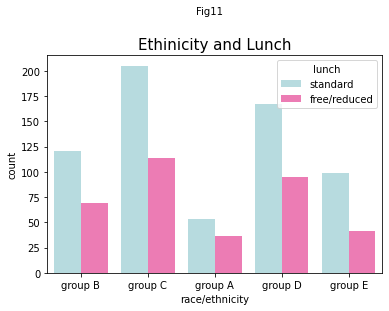

In [17]:
plt.title('Ethinicity and Lunch',fontsize=15)
plt.suptitle("Fig11", y=1.05, fontsize=10)
sns.countplot(x="race/ethnicity", hue="lunch", data=data,palette = ['powderblue','hotpink'])

Text(0.5, 1.05, 'Fig12')

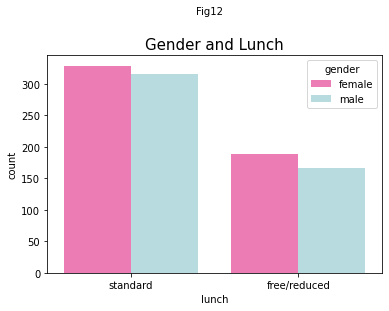

In [18]:
sns.countplot(x="lunch", hue="gender", data=data,palette = ['hotpink','powderblue'])
plt.title('Gender and Lunch',fontsize=15)
plt.suptitle("Fig12", y=1.05, fontsize=10)

In [19]:
# Making another columns
data['Total_Marks'] = data['math_score'] +data['reading_score']+data['writing_score']
data["Percentage"] = round(data['Total_Marks']/300 * 100,2)

data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Marks,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [20]:
def grading(scores):
    if scores >= 85 and scores <= 100:
        return ("A")
    elif scores >= 70 and scores < 85:
        return ("B")
    elif scores>= 55 and scores < 70:
        return("C")
    elif scores >= 35 and scores < 55:
        return("D")
    else:
        return("E")

data["Grade"] = data['Percentage'].apply(grading)
data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Marks,Percentage,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67,B
1,female,group C,some college,standard,completed,69,90,88,247,82.33,B
2,female,group B,master's degree,standard,none,90,95,93,278,92.67,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33,D
4,male,group C,some college,standard,none,76,78,75,229,76.33,B


C    350
B    343
D    173
A    116
E     18
Name: Grade, dtype: int64


<AxesSubplot:xlabel='Grade', ylabel='count'>

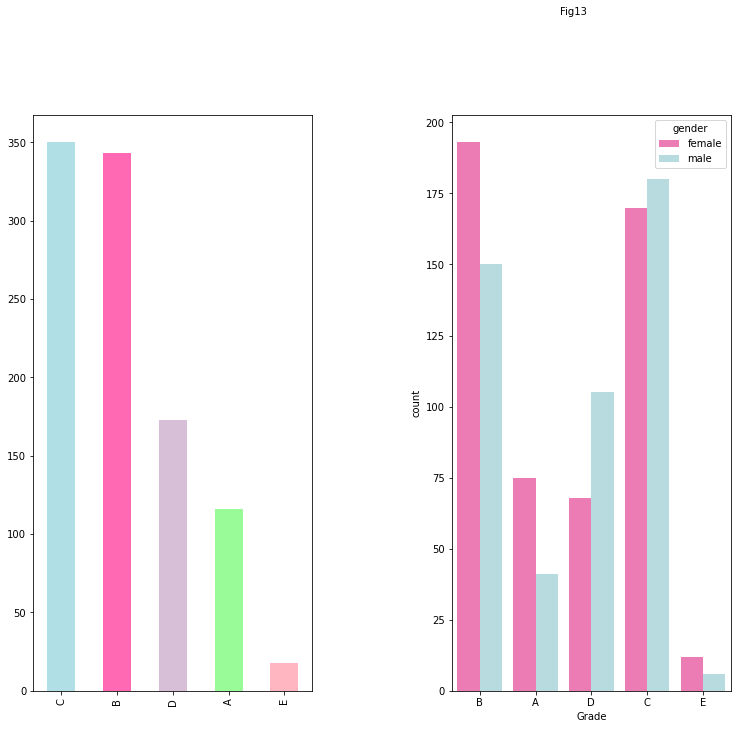

In [21]:
print(data['Grade'].value_counts())
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,wspace=0.5, hspace=0.5)
plt.title('Grades',fontsize=15)
plt.suptitle("Fig13", y=1.05, fontsize=10)

plt.subplot(131)
data['Grade'].value_counts().plot(kind = 'bar',color = ['powderblue','hotpink','thistle','palegreen','lightpink'])

plt.subplot(132)
sns.countplot(hue="gender", x="Grade", data=data,palette = ['hotpink','powderblue'])

Text(0.5, 1.05, 'Fig14')

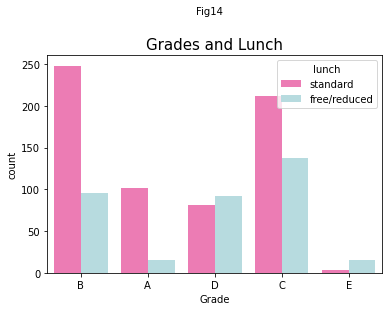

In [22]:
sns.countplot(hue="lunch", x="Grade", data=data,palette = ['hotpink','powderblue'])
plt.title('Grades and Lunch',fontsize=15)
plt.suptitle("Fig14", y=1.05, fontsize=10)

### CONCLUSION:

1. The dataset is about the students Performance in a school/College. There are 1000 observations and 8 variables in the dataset. The dataset has no missing values. Using the nunique() we get to know that most of the variables are categorical variables. Most of them are binary classification.

2. A barchart is a simple diagram that is commonly used to represent the categorical variables. In this dataset the categorical variables are:

    * Gender (binary classification)
    * Race/Ethnicity (Multi class classification)
    * parental level of education (Multi class classification) 
    * lunch (binary classification)                 
    * test preparation course (binary classification)
    

3. A bar chart is plotted for all these categotical variables to know their composition. 

     * From __Fig1__, we see that out of 1000 students, 518 students are female and the remaining 482 students are male. 
     * From __Fig 2__ that represents the Race/Ethincity of the students, we observe that most of the students fall into group C category. The least number of students fall in group A. 
     * __Fig 3__ represents parents education level. Most of the parents have done gone to some college and few have got associate's degree. A very small proportion of parents have completed their masters. 
     * __Fig 4__ tells us about the lunch status of the students. The institution provides two types of lunch (ie)standard and free/reduced lunch. Clearly most of the students get standard type of lunch. 
     * __Fig5__ shows the test preparation course which is again classified into 2 types (ie) None and completed. Most of the students have not taken any test preparation course.
     
     
4. Next we go for univariate analysis. The dataset has only 3 variables that are numerical. Those are:  

     * Math_score
     * Reading_score
     * Writing score
   
   A boxplot represents 5 measures (ie) min,Q1,Q2(median),Q3 and max values and the same is represented by __Fig6__ . From the figure we see there are outliers but we won't remove them because it is possible for a student to score extremely low marks in a test. 
   
   
5. The __Fig7__ tells us the composition of girls and boys in each group. We already saw that most of the students fall into group C category. Within that group it is clear that most of them a female. Group A has more number of male.


6. __Fig8__ is a subplot that represent the performance analysis (ie) who scores better female or male. From the bar charts it is clear that male students are good in maths while female students are good in both reading and writing.  Also the table shows the mean scores for each subject with respect to the gender. From that table also it is clear that mean scores for females is slightly low in math_scores than male students. 



7. It is obvious that when a student does some course and completes it, the knowledge gained by them is more, which results in better performance during exams. Now we can thus say that most of of the male students have completed the course for maths and as a result the mean scores for maths was more for male students. The female students completed the course for reading and writing and hence they scored well (__Fig9__)


8. The scoring pattern to an extent is also affected by parents education too. Clearly students who parents are well educated (ie) those parents who have done bachelors and masters, those studnets score in all the three exams were high. 


9. One way to encourage students to come to school is by providing lunch for them. We already saw that lunch is being categorised into two parts (ie) standart and free. We also saw that most of the students are provided with standart lunch. Free lunch would be provided to those students who are economically poor.(Here it depends on which group the students belong to) __Fig11__ gives us a picture about the same and we can say that all the groupes are provided with standard lunch. The free lunch provided is more for female students(__Fig12__).



10. 3 new columns were added to the dataset. The last column tells the grade each student belongs to. Most of the students belong to grade C (ie) their percentage lies between 35-55%. More number of female students belong to grade B. We also wish to know that what type of lunch a student gets based on his grade (ie) we want to check if a student's grade is good then does he/she get free lunch. Clearly there is nothing like that.